## Importations

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tools import *

C:\Users\anatole parre\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [29]:
# Importations
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Activation
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import SGD

# Simple classification

In [2]:
#Creation of data

[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train, 3) 
print(Y_train.shape)


Creating data:
0
100
200
(300, 3)


### Choice of the optimizer

In [3]:
# Choose the optimizer you want to use

optimizer_choice = 'adam'
#optimizer_choice = 'sgd'

In [4]:
#Definition of the first network

nb_neurons=15
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
    
model = Sequential([
    Dense(nb_neurons, input_shape=(X_train[0].shape[0],)),
    Activation('sigmoid'),
    Dense(3),
    Activation('sigmoid')
    
])

#Training with adam
if optimizer_choice == 'adam':
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam')

    model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1)
#Training with sgd
elif optimizer_choice == 'sgd':
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd)

    model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
300/300 [==============================] - 2s 6ms/step - loss: 1.0541
Epoch 2/30
300/300 [==============================] - 0s 208us/step - loss: 0.9472
Epoch 3/30
300/300 [==============================] - 0s 208us/step - loss: 0.8981
Epoch 4/30
300/300 [==============================] - 0s 208us/step - loss: 0.8564
Epoch 5/30
300/300 [==============================] - 0s 208us/step - loss: 0.8411
Epoch 6/30
300/300 [==============================] - 0s 156us/step - loss: 0.8116
Epoch 7/30
300/300 [==============================] - 0s 156us/step - loss: 0.7910
Epoch 8/30
300/300 [==============================] - 0s 208us/step - loss: 0.7716
Epoch 9/30
300/300 [==============================] - 0s 208us/step - loss: 0.7586
Epoch 10/30
300/300 [==============================] - 0s 208us/step - loss: 0.7466
Epoch 11/30
300/300 [==============================] - 0s 208us/step - loss: 0.7314
Epoch 12/30
300/300 [==============================] - 0s 208us/step - loss: 0.7182
Epo

In [5]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0.5126853 , 0.26371828, 0.02389534]], dtype=float32)

The results are better with the $sgd$ optimizer : the loss function takes values really inferior to $Adam$. For example, after 30 iterations, we get an average loss of $0.15$ for $sgd$ and $0.3$ for $Adam$, and the final accuracy is better with $sgd$

# Visualization of the Solution

We print the weigths computed after training of the network. 
We see directly on the weights the shape of the geometrical objects we want to classify. Indeed, the weights compute the borders of the geometrical objects, by calculating difference (gradients), where borders are expected to be.
Some of the neurons are fully noisy, meaning that they didn't learn anything.

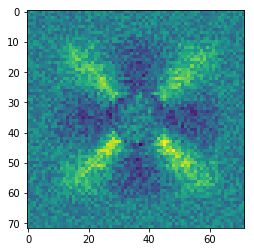

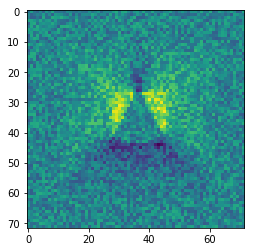

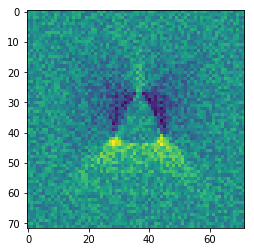

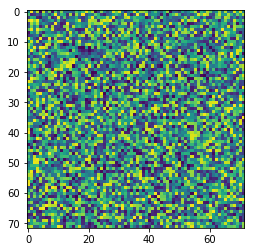

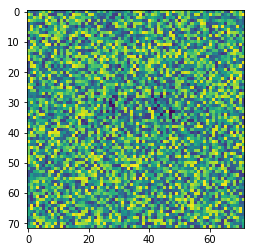

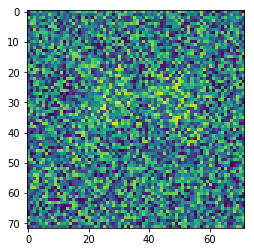

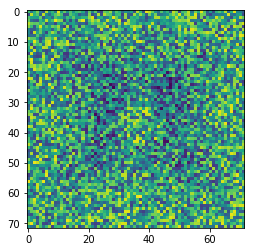

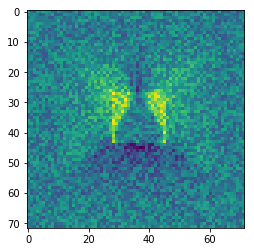

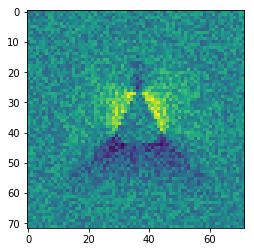

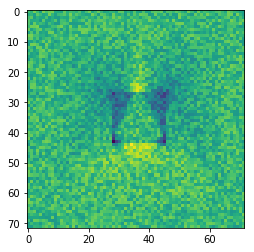

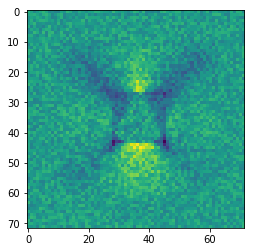

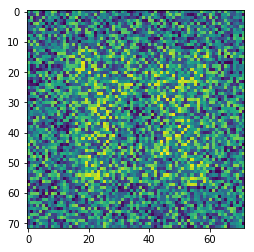

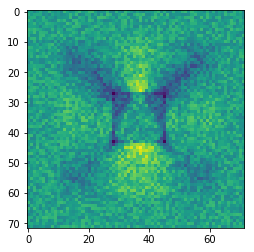

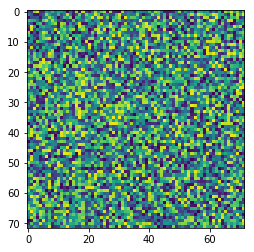

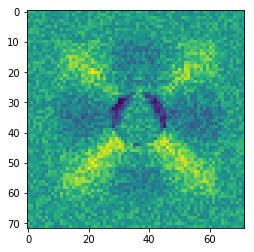

In [6]:
for i in range(nb_neurons):
    plt.imshow(model.get_weights()[0][:,i].reshape(72,72))
    plt.show()

# A more difficult classification problem

In [7]:
# Creating data

# input image dimensions
img_rows, img_cols = 72, 72

# the data, split between train and test sets
[X_train, Y_train] = generate_dataset_classification(800, 20, True)
[X_test, Y_test] = generate_test_set_classification()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

Y_train = np_utils.to_categorical(Y_train, 3)
    
print(input_shape)
    
print('The shape of x_train is:', X_train.shape)
print('The shape of y_train is:', Y_train.shape)
print('The shape of x_test is:', X_test.shape)
print('The shape of y_test is:', Y_test.shape)
print('There are ', X_train.shape[0], 'train samples')
print('There are ', X_test.shape[0], 'test samples')


Creating data:
0
100
200
300
400
500
600
700
Creating data:
0
100
200
(72, 72, 1)
The shape of x_train is: (800, 72, 72, 1)
The shape of y_train is: (800, 3)
The shape of x_test is: (300, 72, 72, 1)
The shape of y_test is: (300, 3)
There are  800 train samples
There are  300 test samples


In [19]:
#Definition of the network

batch_size = 32
epochs = 20
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 


model_complexe = Sequential()
model_complexe.add(Conv2D(16, kernel_size=(5, 5),
                   activation='relu',
                   input_shape=input_shape))
model_complexe.add(MaxPooling2D(pool_size=(4, 4)))
model_complexe.add(Flatten())
model_complexe.add(Dense(32))
model_complexe.add(Activation('relu'))
model_complexe.add(Dropout(0.25))
model_complexe.add(Dense(3))
model_complexe.add(Activation('softmax'))

In [20]:
# Training
model_complexe.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model_complexe.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/20
800/800 [==============================] - 4s 5ms/step - loss: 1.0972 - acc: 0.4075
Epoch 2/20
800/800 [==============================] - 4s 4ms/step - loss: 1.0140 - acc: 0.4850
Epoch 3/20
800/800 [==============================] - 4s 4ms/step - loss: 0.9004 - acc: 0.5625
Epoch 4/20
800/800 [==============================] - 4s 4ms/step - loss: 0.8017 - acc: 0.6525
Epoch 5/20
800/800 [==============================] - 4s 4ms/step - loss: 0.7249 - acc: 0.6825
Epoch 6/20
800/800 [==============================] - 4s 4ms/step - loss: 0.6649 - acc: 0.7125
Epoch 7/20
800/800 [==============================] - 4s 4ms/step - loss: 0.6232 - acc: 0.7350
Epoch 8/20
800/800 [==============================] - 4s 5ms/step - loss: 0.5836 - acc: 0.7437
Epoch 9/20
800/800 [==============================] - 4s 5ms/step - loss: 0.5202 - acc: 0.7850
Epoch 10/20
800/800 [==============================] - 4s 4ms/step - loss: 0.4878 - acc: 0.8113
Epoch 11/20
800/800 [============================

In [21]:
#Evaluation on the test dataset

score = model_complexe.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

300/300 [==============================] - 1s 3ms/step
Test loss: 0.3989836390813192
Test accuracy: 0.8566666674613953


We needed a much bigger network, and not only fully connected layers but also convolution to learn this task. Indeed, geometrical objects can now be anywhere in the image, so it is important to have patches that get informations all over the image.

# A regresion problem

In [120]:
# Creation of the dataset

[X_train_regr, Y_train_regr] = generate_dataset_regression(900, 20)
[X_test_regr, Y_test_regr] = generate_test_set_regression()

img_rows, img_cols = 72, 72
input_shape = (img_rows, img_cols, 1)
X_test_regr = X_test_regr.reshape(X_test_regr.shape[0], img_rows, img_cols, 1)
X_train_regr = X_train_regr.reshape(X_train_regr.shape[0], img_rows, img_cols, 1)

Creating data:
0
100
200
300
400
500
600
700
800
Creating data:
0
100
200


We define an order function to havec a bijection between the regression and the points of the input label. 
The input label is now always sorted, so a regression can only be reached by a unique triplet of points.

In [121]:
def order(Y):
    New_Y = np.zeros((Y.shape[0], Y.shape[1]))
    for i, y in enumerate(Y):
        y = y.reshape((3,2))
        y = y[y[:,0].argsort()]
        New_Y[i,:] = y.reshape(6)
    return(New_Y)

Y_train_regr_norm = order(Y_train_regr)
Y_test_regr_norm = order(Y_test_regr)

In [126]:
batch_size = 32
epochs = 20
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 


model_complexe = Sequential()
model_complexe.add(Conv2D(32, kernel_size=(5, 5),
                   activation='relu',
                   input_shape=input_shape))
model_complexe.add(MaxPooling2D(pool_size=(2, 2)))

model_complexe.add(Conv2D(64, kernel_size=(3, 3),
                   activation='relu',
                   input_shape=input_shape))
model_complexe.add(MaxPooling2D(pool_size=(2, 2)))

model_complexe.add(Flatten())
model_complexe.add(Dropout(0.25))
model_complexe.add(Dense(64))
model_complexe.add(Activation('relu'))
model_complexe.add(Dense(6))

model_complexe.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

In [127]:
#training
model_complexe.fit(X_train_regr, Y_train_regr_norm,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/20
900/900 [==============================] - 18s 20ms/step - loss: 0.0941 - acc: 0.4778
Epoch 2/20
900/900 [==============================] - 15s 17ms/step - loss: 0.0595 - acc: 0.5089
Epoch 3/20
900/900 [==============================] - 16s 17ms/step - loss: 0.0535 - acc: 0.5122
Epoch 4/20
900/900 [==============================] - 15s 17ms/step - loss: 0.0456 - acc: 0.5267
Epoch 5/20
900/900 [==============================] - 15s 17ms/step - loss: 0.0392 - acc: 0.5744
Epoch 6/20
900/900 [==============================] - 14s 16ms/step - loss: 0.0368 - acc: 0.5933
Epoch 7/20
900/900 [==============================] - 14s 16ms/step - loss: 0.0341 - acc: 0.6078
Epoch 8/20
900/900 [==============================] - 16s 18ms/step - loss: 0.0327 - acc: 0.6067
Epoch 9/20
900/900 [==============================] - 18s 20ms/step - loss: 0.0313 - acc: 0.6089
Epoch 10/20
900/900 [==============================] - 16s 18ms/step - loss: 0.0305 - acc: 0.6167
Epoch 11/20
900/900 [========

Results : accuracy on the test dataset and visualization of the results. The results we get are far from beeing paerfect, but we can see that the network learns and that we are not so far from having good results.

In [128]:
score = model_complexe.evaluate(X_test_regr, Y_test_regr_norm, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

300/300 [==============================] - 3s 9ms/step
Test loss: 0.026131062060594557
Test accuracy: 0.6233333325386048


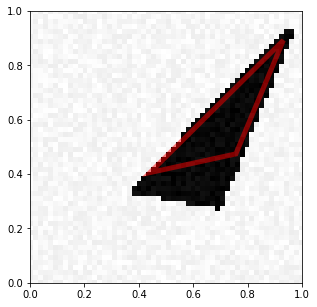

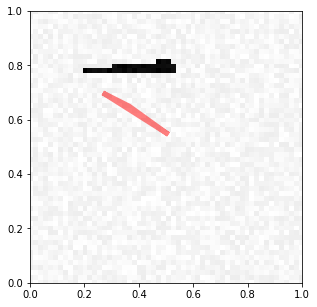

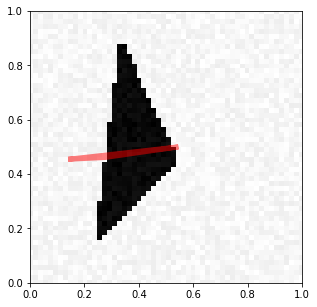

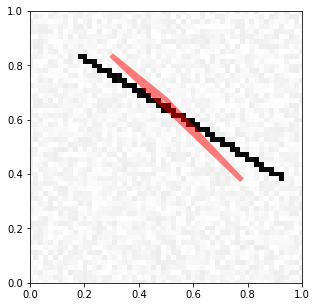

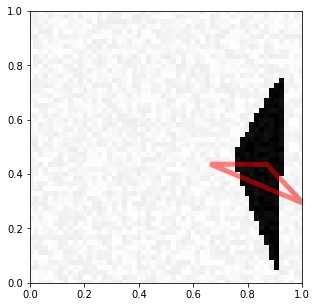

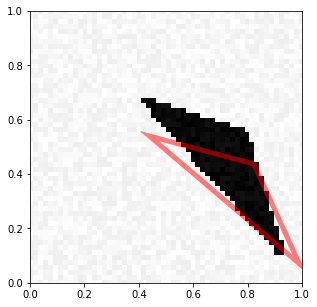

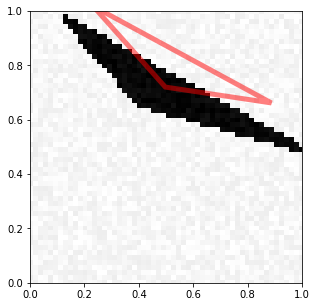

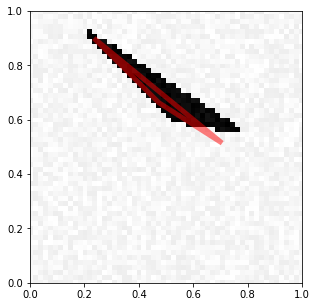

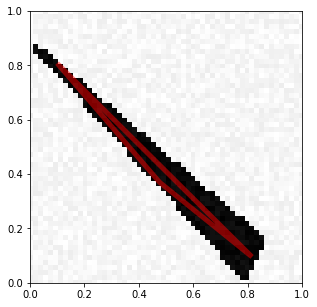

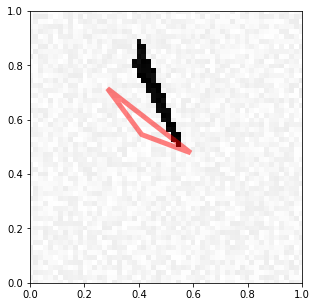

In [129]:
for i in range(10):
    visualize_prediction(X_test_regr[i], model_complexe.predict(X_test_regr[i].reshape(1,img_rows, img_cols, 1)))

# Image Denoising

In order to denoise an image we build an autoencoder. To do so, we have two parts : first, the encoder which reduces the image to features. Then, from these features, the decoder rebuild the image. 
Here, we have built a convolutional autoencoder.

In [95]:
# Creation of the dataset

[X_train_denois, Y_train_denois] = generate_dataset_denoising(300, 20)
[X_test_denois, Y_test_denois] = generate_test_set_denoising()

img_rows, img_cols = 72, 72
input_shape = (img_rows, img_cols, 1)
X_test_denois = X_test_denois.reshape(X_test_denois.shape[0], img_rows, img_cols, 1)
X_train_denois = X_train_denois.reshape(X_train_denois.shape[0], img_rows, img_cols, 1)

Y_test_denois = Y_test_denois.reshape(Y_test_denois.shape[0], img_rows, img_cols, 1)
Y_train_denois = Y_train_denois.reshape(Y_train_denois.shape[0], img_rows, img_cols, 1)

Creating data:
0
100
200
Creating data:
0
100
200


In [107]:
batch_size = 32
epochs = 10
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 

# encoder
model_denoise = Sequential()
model_denoise.add(Conv2D(32, kernel_size=(3, 3),
                   activation='relu',
                   padding = 'same',
                   input_shape=input_shape))
model_denoise.add(MaxPooling2D(pool_size=(2, 2)))
model_denoise.add(Conv2D(32, kernel_size=(3, 3),
                   activation='relu',
                   padding = 'same',
                   input_shape=input_shape))

# decoder
model_denoise.add(Conv2D(32, kernel_size=(3, 3),
                   activation='relu',
                   padding = 'same',
                   input_shape=input_shape))
model_denoise.add(UpSampling2D((2, 2)))
model_denoise.add(Conv2D(1, kernel_size=(3, 3),
                   activation='sigmoid',
                   padding = 'same',
                   input_shape=input_shape))

model_denoise.compile(loss='mean_squared_error',
              optimizer='adadelta')


In [108]:
#training
model_denoise.fit(X_train_denois, Y_train_denois,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/10
300/300 [==============================] - 14s 47ms/step - loss: 0.1125 - acc: 1.2860e-06
Epoch 2/10
300/300 [==============================] - 11s 38ms/step - loss: 0.0098 - acc: 1.2860e-06
Epoch 3/10
300/300 [==============================] - 10s 35ms/step - loss: 0.0067 - acc: 1.2860e-06
Epoch 4/10
300/300 [==============================] - 10s 35ms/step - loss: 0.0058 - acc: 1.2860e-06
Epoch 5/10
300/300 [==============================] - 10s 35ms/step - loss: 0.0056 - acc: 1.2860e-06
Epoch 6/10
300/300 [==============================] - 10s 35ms/step - loss: 0.0052 - acc: 1.2860e-06
Epoch 7/10
300/300 [==============================] - 11s 36ms/step - loss: 0.0047 - acc: 1.2860e-06
Epoch 8/10
300/300 [==============================] - 10s 35ms/step - loss: 0.0051 - acc: 1.2860e-06
Epoch 9/10
300/300 [==============================] - 11s 36ms/step - loss: 0.0042 - acc: 1.2860e-06
Epoch 10/10
300/300 [==============================] - 11s 35ms/step - loss: 0.0044 - acc: 

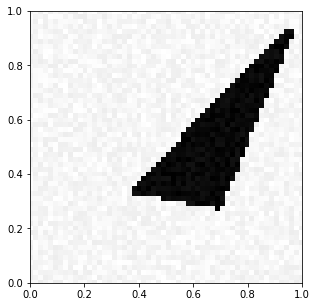

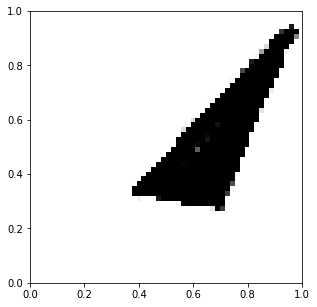

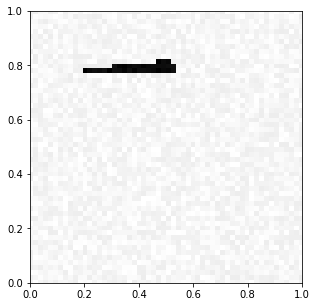

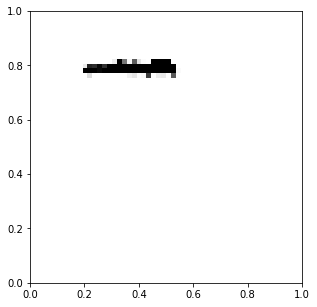

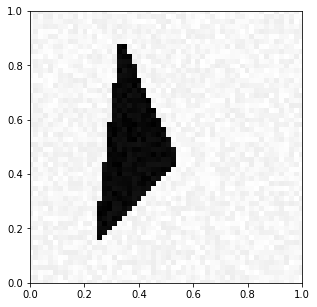

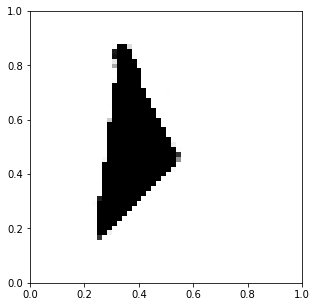

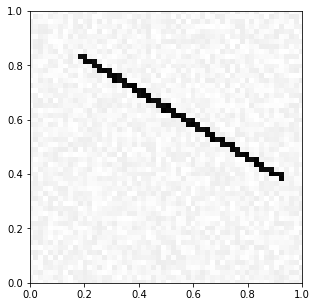

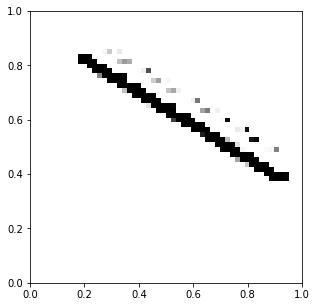

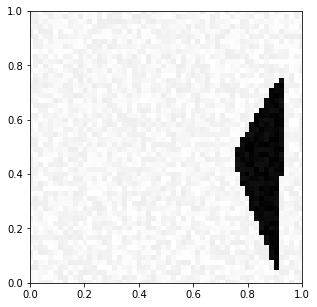

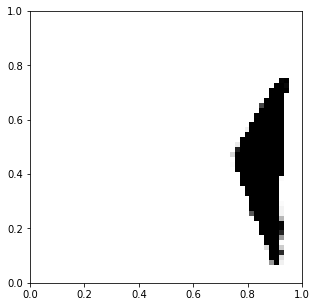

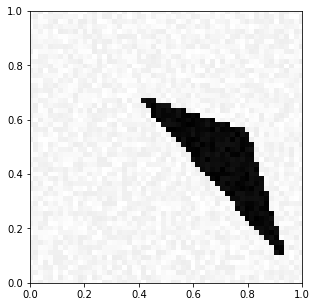

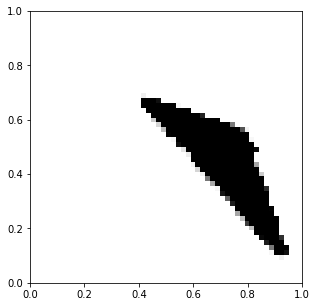

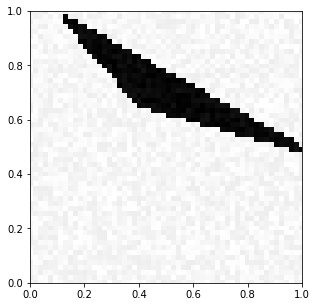

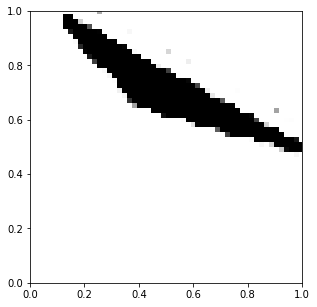

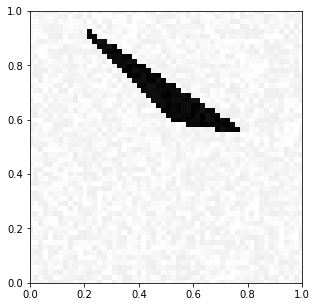

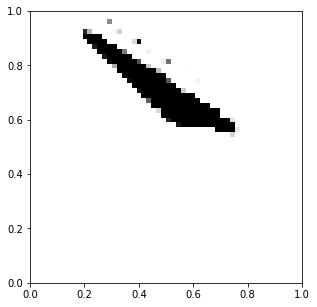

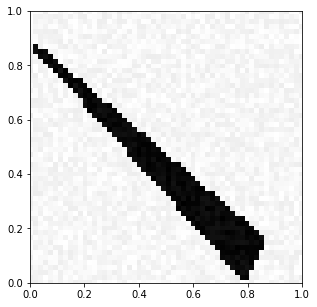

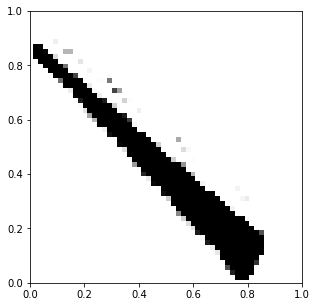

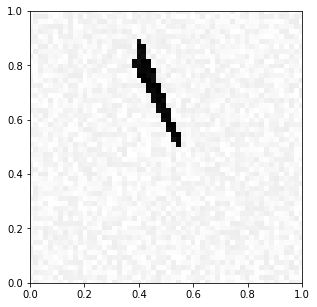

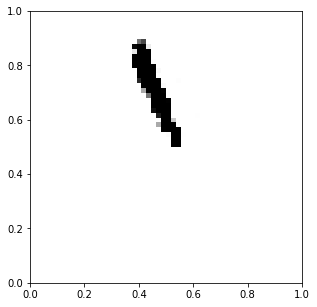

In [109]:
def visualize(x):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])


for i in range(10):
    visualize(X_test_denois[i])
    visualize(model_denoise.predict(X_test_denois[i].reshape(1,img_rows, img_cols, 1)))

The results are pretty good with a small network, to have few parameters to learn.